## Group 7 
### Tejas Desai : tdesai5@depaul.edu
### Akshay Patel: apate302@depaul.edu
### Ashish Gare: agare@depaul.edu
### Mariia Malovance: mmalovan@depaul.edu

In [1]:
import numpy as np
import pandas as pd
import os

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from xgboost import plot_importance, plot_tree
from matplotlib.pylab import rcParams
import pylab as pl
from sklearn.metrics import precision_recall_curve, roc_curve


#machine learning libraries
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
#model selection
from sklearn.model_selection import train_test_split,GridSearchCV

#metrics
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,precision_score,recall_score,f1_score,balanced_accuracy_score,accuracy_score
from sklearn import metrics

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Pipeline
from sklearn import pipeline

# Sampling
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Loading the data

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis

Let's see the basic statistics of our data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Here we have 9 categorical features. The rest are ordinal or continuous values.

Let's look at the categorical columns

In [6]:
categories = df.select_dtypes([object]).columns
print(categories)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [7]:
df.select_dtypes([object]).head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


Let's look at the unique values of each category.

In [8]:
for i in df.select_dtypes([object]).columns:
    print(i,":",df[i].unique())

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
Over18 : ['Y']
OverTime : ['Yes' 'No']


| Feature | Comment |
| --- | --- |
| **Attrition** | This is the label of interest. We will convert this to a binary variable {1: yes, 0: no} |
| **BusinessTravel** | We will convert this to an ordinal variable {0: Non-Travel, 1: Travel_Rarely, 2: Travel_Frequently} |
| **Department** | This is purely categorical, so we will have to one-hot encode or convert to a dummy variable |
| **EducationField** | This is purely categorical, so we will have to one-hot encode or convert to a dummy variable |
| **Gender** | There are only 2 values in the dataset, so we can convert this to a binary variable. This is legally protected data, so we have to be careful that using this feature does not lead to any forms of gender discrimination. |
| **JobRole** | This is purely categorical, so we will have to one-hot encode or convert to a dummy variable. This category has a decent number of values. By converting it, we are increasing our dimensionality by 9. This could lead to the curse of dimensionality. |
| **MaritalStatus** | Categorical, but one could make the case to make it ordinal. If we made it ordinal, then the mapping would be {0: Single, 1: Married, 2: Divorced}. Again, we have to be careful as using this information to make a hiring decision would be illegal. The likely option is to drop the column. |
| **Over18** | This feature only has 1 value, so we will drop it. |
| **OverTime** | We will convert this to a binary variable {0: No, 1: Yes} |

For now we are transforming the ordinal features into their numeric typed columns and drop the constant column.

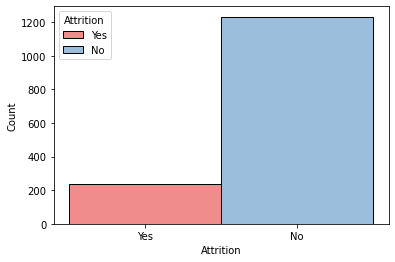

In [9]:
sns.histplot(df,x="Attrition",hue="Attrition",palette="Set1")
plt.show()

The labels are very unbalanced. This will lead to problems with misclassification of the yes values and overfitting.

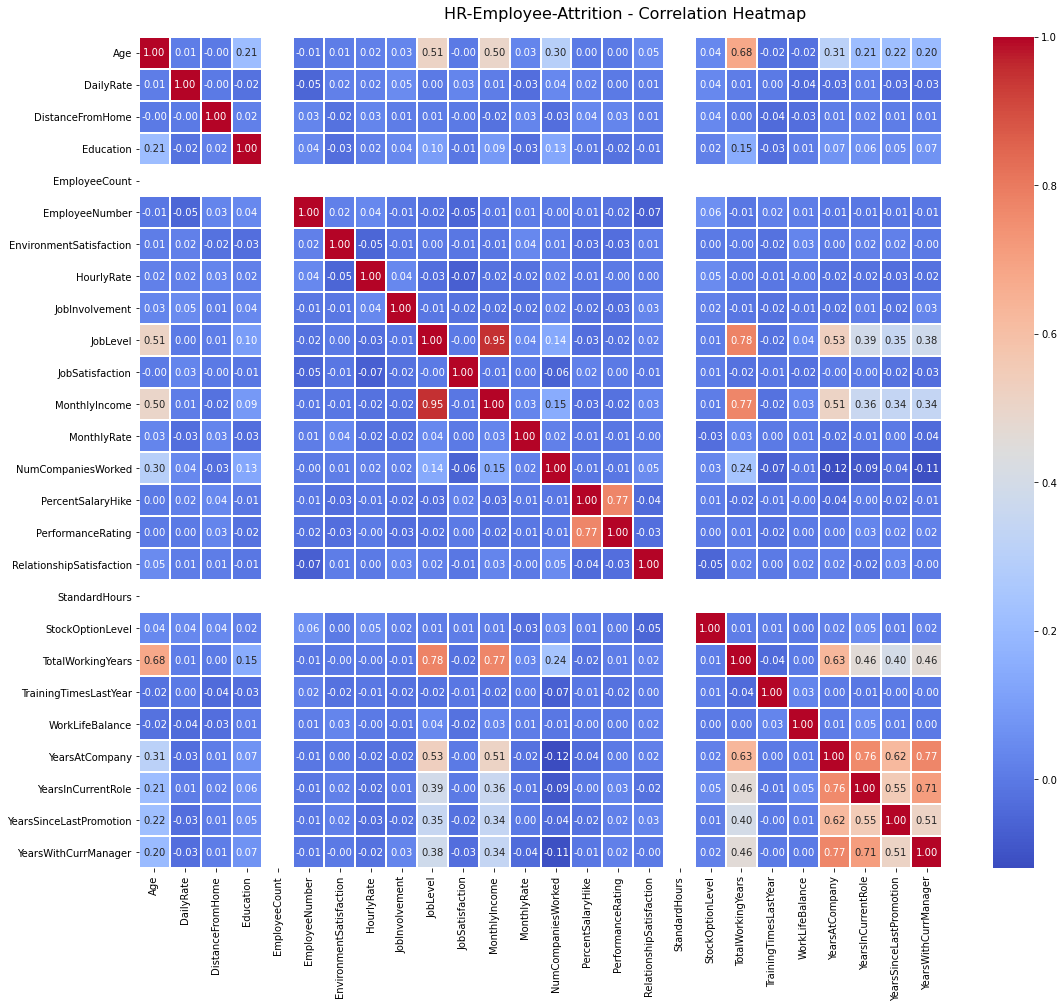

In [10]:
# Correlation Plot
f, ax = plt.subplots(figsize=(18, 14))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.95)
t= f.suptitle('HR-Employee-Attrition - Correlation Heatmap', fontsize=16)

Text(0.5, 0, 'Age')

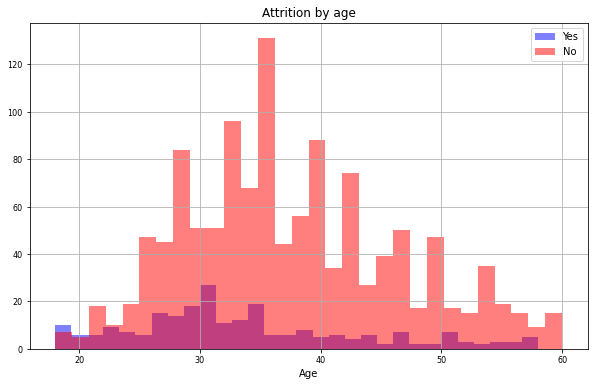

In [11]:
fig = plt.figure(figsize=(10, 6))
(df[df['Attrition'] == "Yes"]['Age']).hist(bins=30, color='blue', linewidth=1.0,alpha=0.5, label = 'Yes',
              xlabelsize=8, ylabelsize=8, grid=True)  
(df[df['Attrition'] == "No"]['Age']).hist(bins=30, color='red', linewidth=1.0,alpha=0.5,label = 'No',
              xlabelsize=8, ylabelsize=8, grid=True)  
plt.legend()
plt.title("Attrition by age")
plt.xlabel("Age")

#### Younger employees were more likely to leave

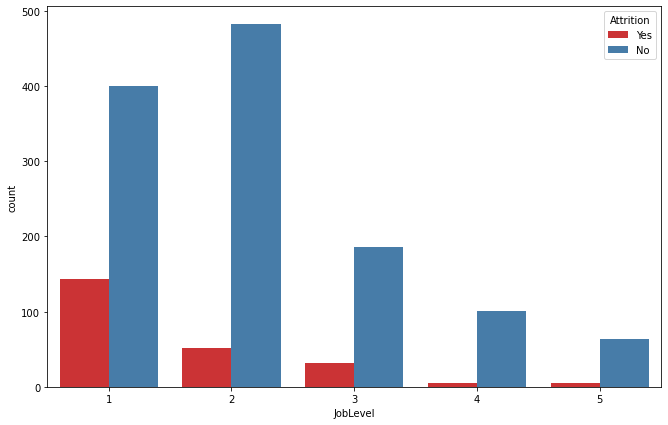

In [12]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="JobLevel", hue="Attrition", data=df, palette="Set1")

Performing a groupby, we can get the percent attrition rate by job level.

In [13]:
df[["Attrition","JobLevel"]].groupby(["JobLevel","Attrition"]).size().groupby(level=[0]).apply(lambda x: np.round(x/x.sum(),2))

JobLevel  Attrition
1         No           0.74
          Yes          0.26
2         No           0.90
          Yes          0.10
3         No           0.85
          Yes          0.15
4         No           0.95
          Yes          0.05
5         No           0.93
          Yes          0.07
dtype: float64

At a lower job level, an employee is more likely to leave the company.

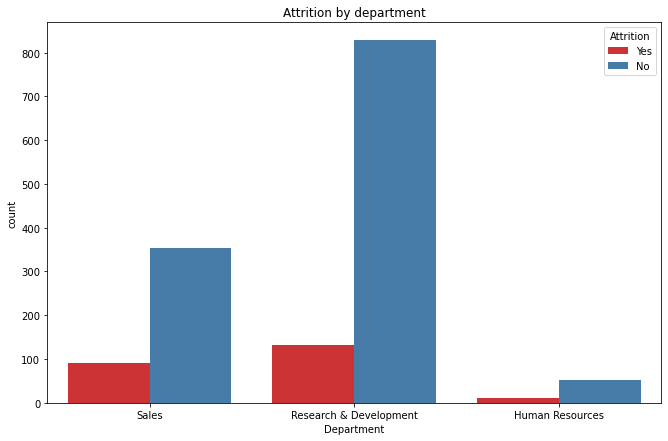

In [14]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="Department", hue="Attrition", data=df, palette="Set1")
ax.set_title("Attrition by department")
plt.show()

In [15]:
df[["Department","Attrition"]].groupby(["Department","Attrition"]).size().groupby(level=[0]).apply(lambda x: np.round(x/x.sum(),2))

Department              Attrition
Human Resources         No           0.81
                        Yes          0.19
Research & Development  No           0.86
                        Yes          0.14
Sales                   No           0.79
                        Yes          0.21
dtype: float64

#### Sales and HR have higher attrition rates compared to research and development  department

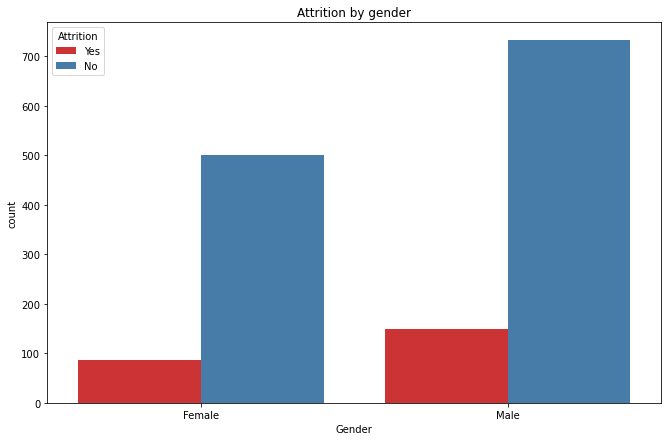

In [16]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="Gender", hue="Attrition", data=df, palette="Set1")
ax.set_title("Attrition by gender")
plt.show()

In [17]:
round(df[["Gender","Attrition"]].groupby(["Gender","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)


Gender  Attrition
Female  No           0.85
        Yes          0.15
Male    No           0.83
        Yes          0.17
dtype: float64

#### Males were found to be slighty more likely to leave

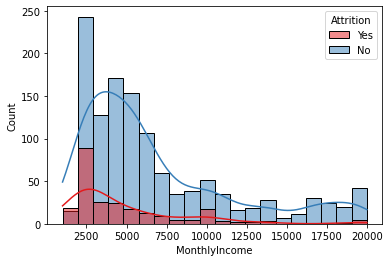

In [18]:
sns.histplot(df,x="MonthlyIncome",hue="Attrition",kde=True,palette="Set1")
plt.show()

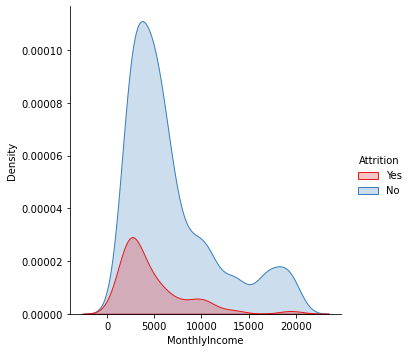

In [19]:
sns.displot(df,x="MonthlyIncome",hue="Attrition",kind="kde",palette="Set1",fill=True)
plt.show()

#### Attrition rate is higher at lower monthly income 

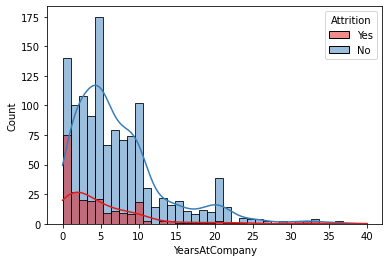

In [20]:
sns.histplot(df,x="YearsAtCompany",hue="Attrition",kde=True,palette="Set1")
plt.show()

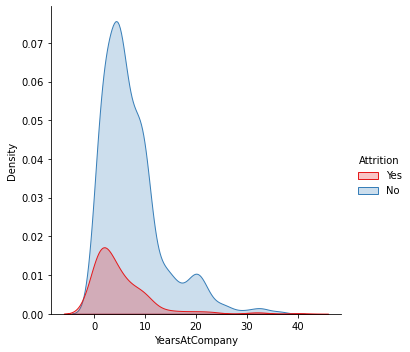

In [21]:
sns.displot(df,x="YearsAtCompany",hue="Attrition",kind="kde",palette="Set1",fill=True)
plt.show()

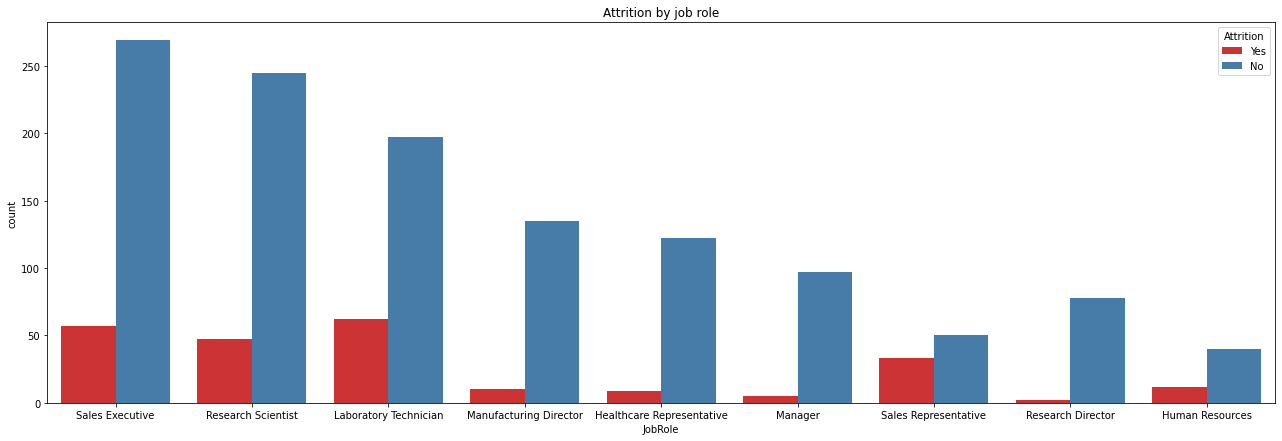

In [22]:
plt.figure(figsize=[22,7])
ax = sns.countplot(x="JobRole", hue="Attrition", data=df, palette="Set1")
ax.set_title("Attrition by job role")
plt.show()

In [23]:
round(df[["JobRole","Attrition"]].groupby(["JobRole","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

JobRole                    Attrition
Healthcare Representative  No           0.93
                           Yes          0.07
Human Resources            No           0.77
                           Yes          0.23
Laboratory Technician      No           0.76
                           Yes          0.24
Manager                    No           0.95
                           Yes          0.05
Manufacturing Director     No           0.93
                           Yes          0.07
Research Director          No           0.98
                           Yes          0.02
Research Scientist         No           0.84
                           Yes          0.16
Sales Executive            No           0.83
                           Yes          0.17
Sales Representative       No           0.60
                           Yes          0.40
dtype: float64

#### Sales Representative and Lab Technicain have higher attrition rate

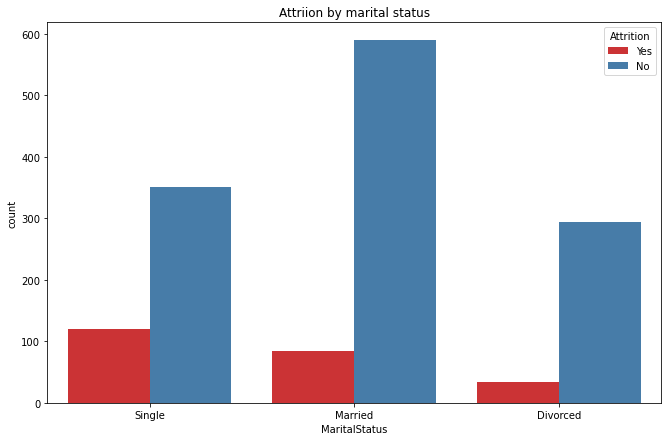

In [24]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="MaritalStatus", hue="Attrition", data=df, palette="Set1")
ax.set_title("Attriion by marital status")
plt.show()

In [25]:
round(df[["MaritalStatus","Attrition"]].groupby(["MaritalStatus","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

MaritalStatus  Attrition
Divorced       No           0.90
               Yes          0.10
Married        No           0.88
               Yes          0.12
Single         No           0.74
               Yes          0.26
dtype: float64

#### Employees who are single have higher rates of attrition compared to married and divorced workers  

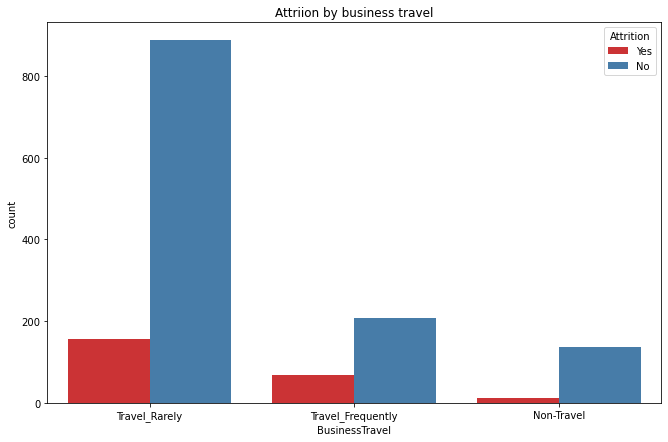

In [26]:
plt.figure(figsize=[11,7])
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=df, palette="Set1")
ax.set_title("Attriion by business travel")
plt.show()

In [27]:
round(df[["BusinessTravel","Attrition"]].groupby(["BusinessTravel","Attrition"]).size().groupby(level=0).apply(lambda x: x/x.sum()),2)

BusinessTravel     Attrition
Non-Travel         No           0.92
                   Yes          0.08
Travel_Frequently  No           0.75
                   Yes          0.25
Travel_Rarely      No           0.85
                   Yes          0.15
dtype: float64

#### Employees who travel frequently have higher attrition rates than who travel rarely or didn’t travel at all 

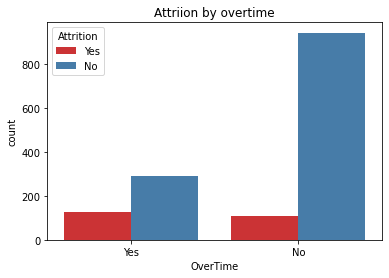

In [28]:
ax = sns.countplot(x="OverTime", hue="Attrition", data=df, palette="Set1")
ax.set_title("Attriion by overtime")
plt.show()

In [29]:
df[["OverTime","Attrition"]].groupby(["OverTime","Attrition"]).size().groupby(level=0).apply(lambda x: np.round(x/x.sum(),2))

OverTime  Attrition
No        No           0.90
          Yes          0.10
Yes       No           0.69
          Yes          0.31
dtype: float64

Employee

# Data transform

Convert some categories to ordinal values

In [30]:
df["Attrition"] = df["Attrition"].map({"No": 0, "Yes": 1})
df["BusinessTravel"] = df["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1,"Travel_Frequently": 2})
df["OverTime"] = df["OverTime"].map({"No": 0, "Yes": 1})
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

#### Dropped below columns (EmployeeCount,Over18,StandardHours) because it's only has one value for all rows. Also dropping EmployeeNumber.

In [31]:
df = df.drop(["Over18","StandardHours","EmployeeCount","EmployeeNumber"],axis=1)

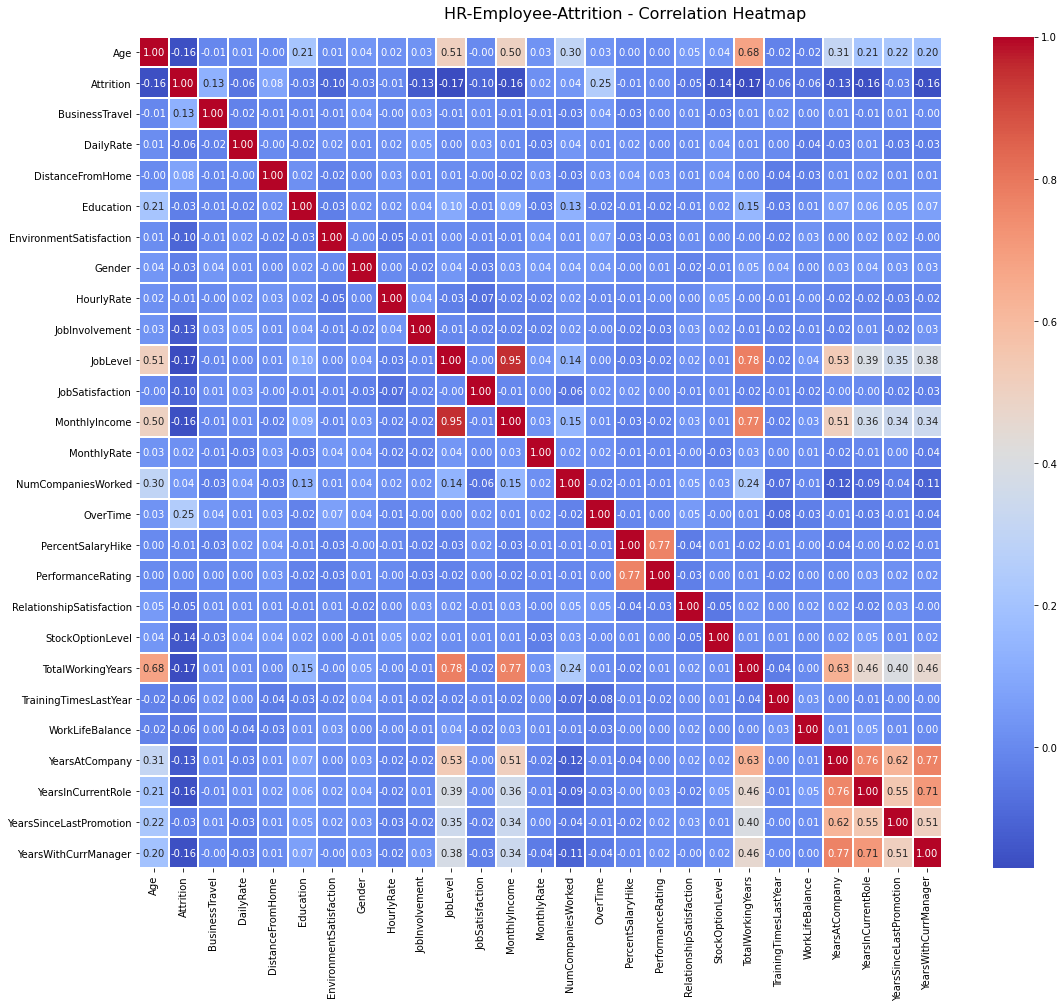

In [32]:
# Correlation Plot
f, ax = plt.subplots(figsize=(18, 14))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.95)
t= f.suptitle('HR-Employee-Attrition - Correlation Heatmap', fontsize=16)

#### We can see from the correlation plot that Attrition does not have strong correlation with any other variables. We can also see from the correlation plot that only few variables have relatively strong correlation. Job Level and Monthly Income has highest correlation of 0.95. 

#### Some other correlated variables are as follows: 
- TotalWorkingYears and Monthly Income (0.78)
- Age and TotalWorkingYears (0.68)
- YearsAtComapny and YearsWithCurrManager (0.77)
- YearsInCurrentRole and YearsWithCurrManager (0.71)
- YearsInCurrentRole and YearsAtCompany (0.76)

#### but these do not have a high enough correlation to be candidates to drop

In [33]:
cat_feats =  ['Department', 'EducationField', 'JobRole', 'MaritalStatus']

Create the dummy variables

In [34]:
# Converting categorical variables to dummy variables
df = pd.get_dummies(df, columns = cat_feats)

### Preparing data from machine learning

In [35]:
X = df.drop('Attrition', axis = 1)
y = df['Attrition']
X.shape

(1470, 47)

Create the train-test split

In [36]:
# Trai, Validation Split
X_train, X_val, y_train, y_val = train_test_split(X, y,stratify=y, test_size=0.20, random_state=1)

scale the data

In [37]:
# Standardization of the data
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_val = ss.transform(X_val)

In [38]:
# Undersampling
r_us = RandomUnderSampler(random_state = 1)
X_under, y_under = r_us.fit_resample(X_train, y_train) 

In [39]:
# Oversampling
r_os = RandomOverSampler(random_state = 1)
X_over, y_over = r_os.fit_resample(X_train, y_train) 

Final correlation plot to show if the transformations revealed anything new

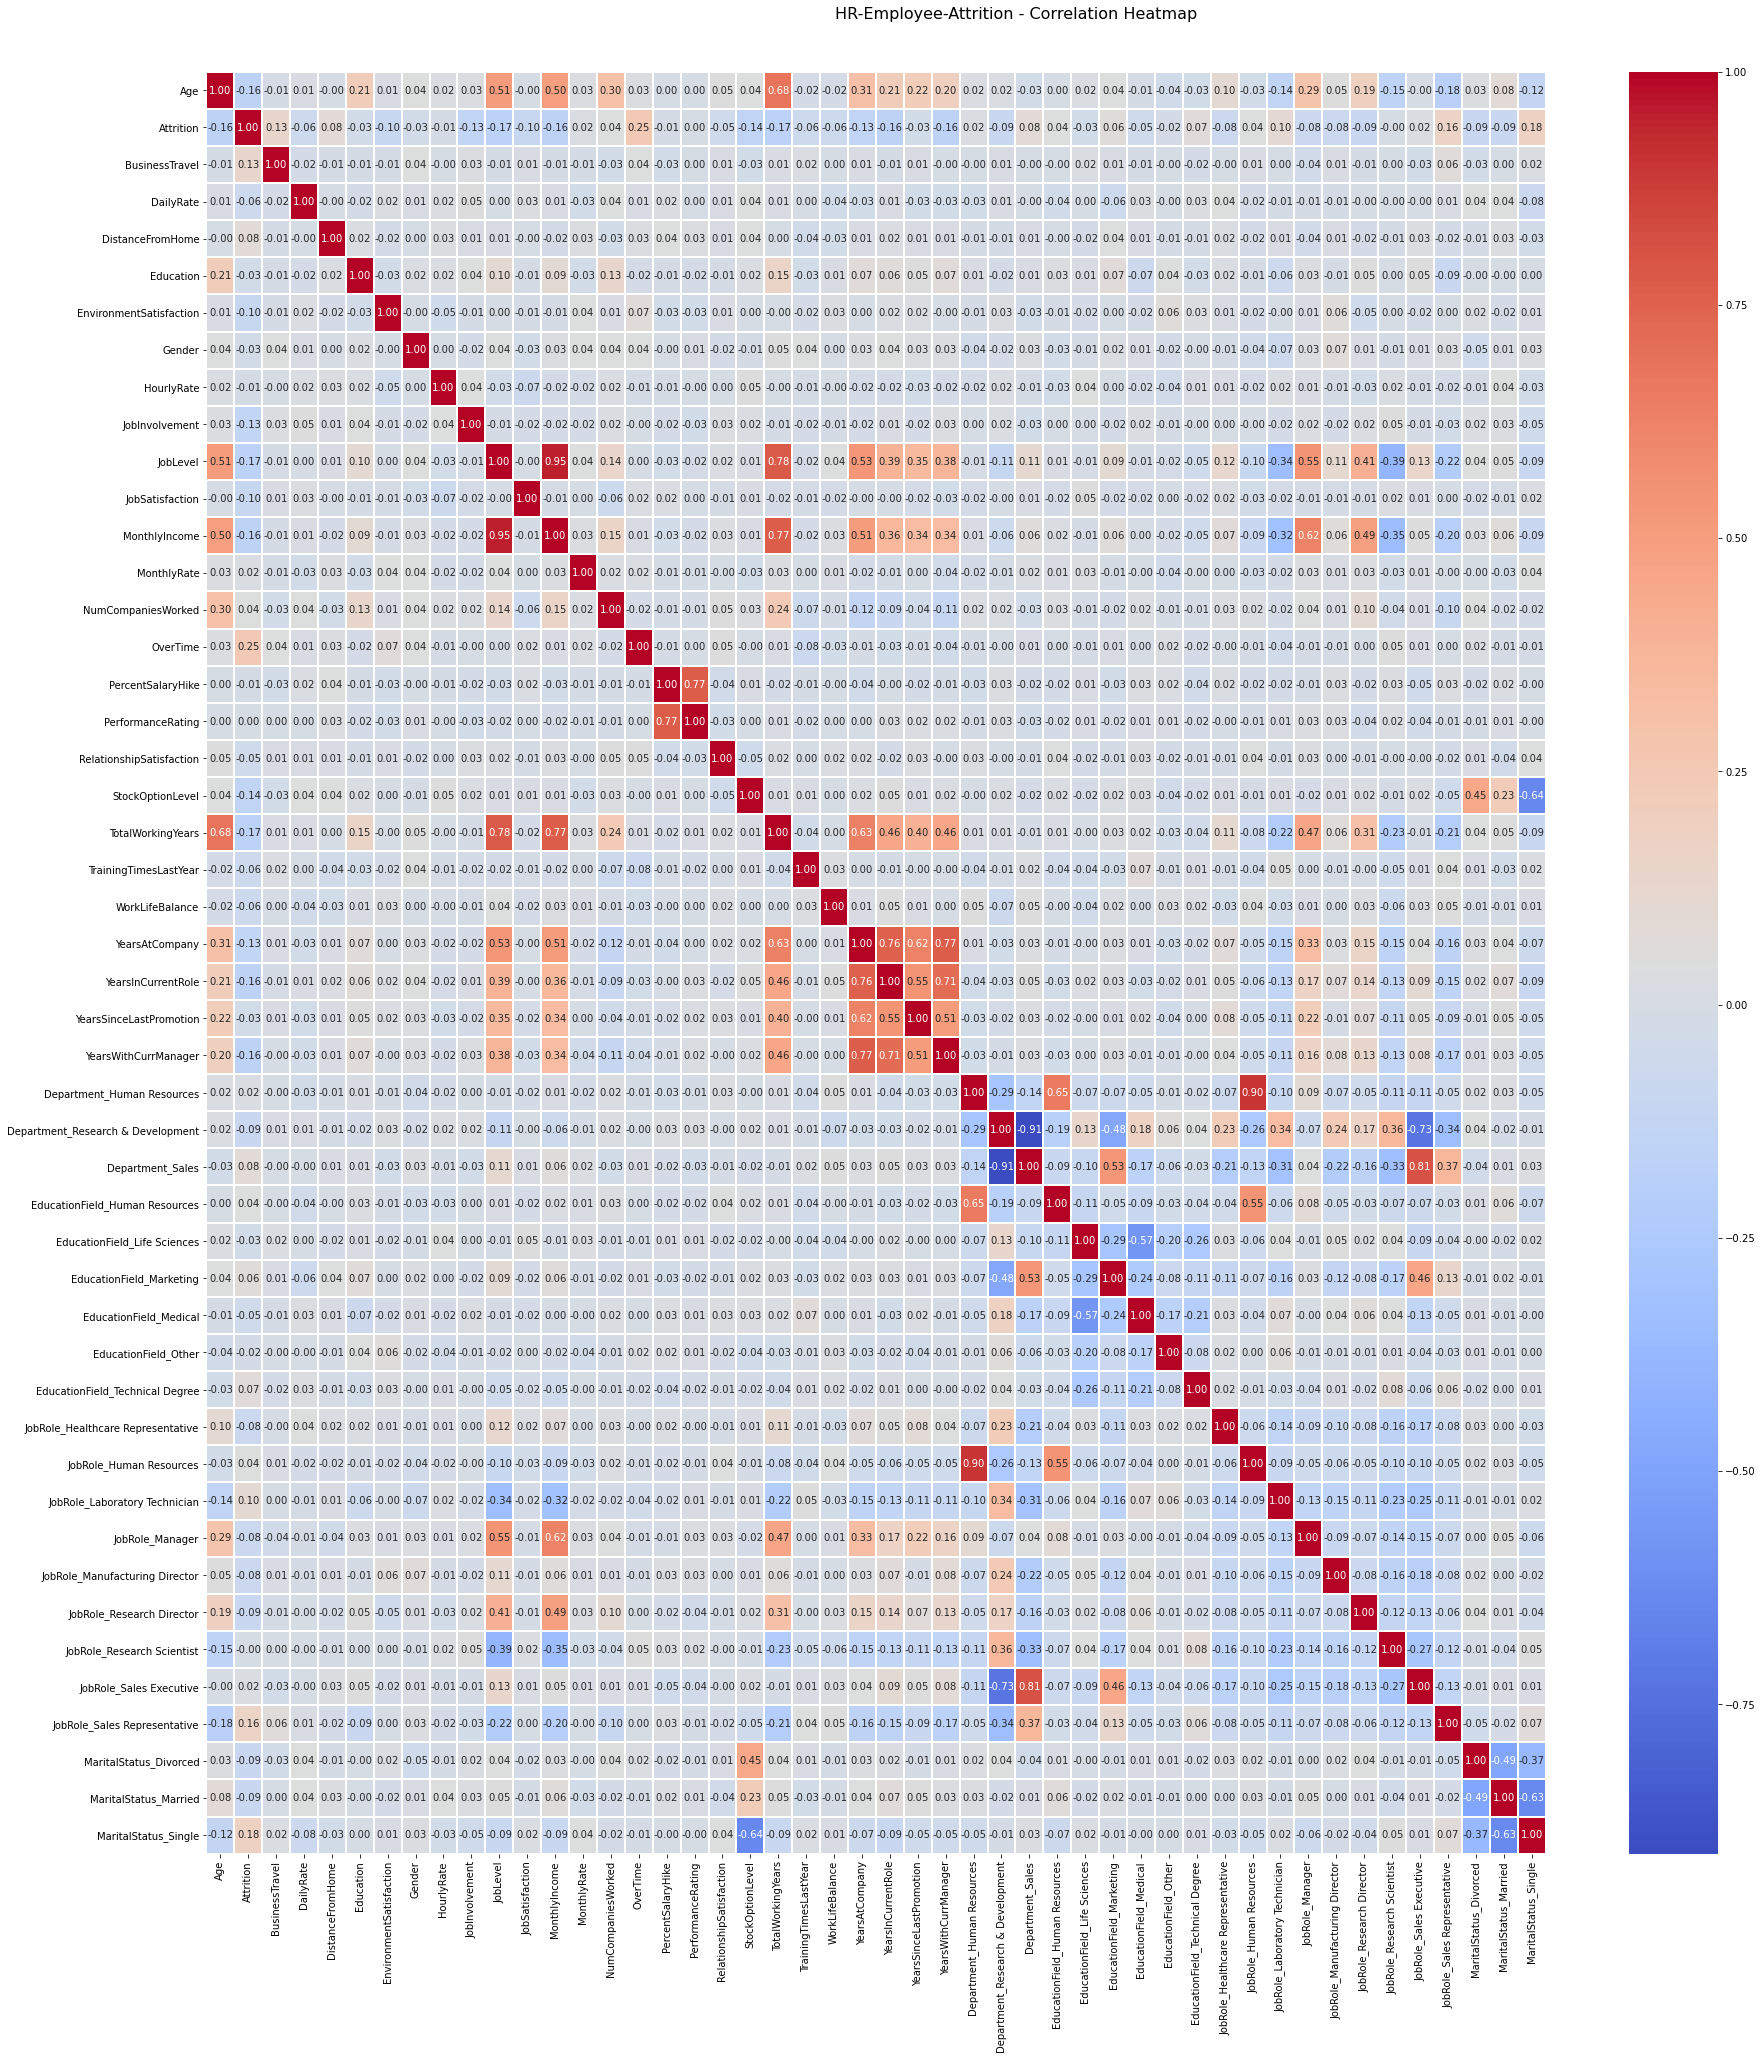

In [40]:
# Correlation Plot
f, ax = plt.subplots(figsize=(30, 30))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.95)
t= f.suptitle('HR-Employee-Attrition - Correlation Heatmap', fontsize=16)

# Helper functions

In [41]:
def training_run_classification(model,parameters,X_train,y_train,X_val,y_val,scoring=None):
    cv_str = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    cv = GridSearchCV(model,parameters,cv=cv_str,n_jobs=-1,scoring=scoring)
    cv.fit(X_train,y_train)
    model = cv.best_estimator_
    print(cv.best_params_)
    pred = model.predict(X_val)
    cm = confusion_matrix(y_val,pred)
    acc = accuracy_score(y_val,pred)
    balanced_accuracy = balanced_accuracy_score(y_val,pred)
    precision = precision_score(y_val,pred)
    recall = recall_score(y_val,pred)
    f1 = f1_score(y_val,pred)
    specificity = cm[0,0]/np.sum(cm[0])
    
    print(f"Accuracy: {acc}")
    print(f"Balanced Accuracy: {balanced_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1: {f1}")
    print(f"Specificity: {specificity}")
    plot_confusion_matrix(model,X_val,y_val)
    plt.show()

    results = {
        "Accuracy": acc,
        "Balanced Accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "f1": f1,
        "Specificity": specificity,
    }

    return model, results

In [42]:
def plot_precision_recall_vs_threshold( precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
def plot(model, y_val ):   
    pred = model.predict(X_val)
    precisions, recalls, thresholds = precision_recall_curve(y_val, pred)
    plt.figure(figsize=(14, 25))
    plt.subplot(4, 2, 1)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

    plt.subplot(4, 2, 2)
    plt.plot(precisions, recalls)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("PR Curve: precisions/recalls tradeoff");

    plt.subplot(4, 2, 3)
    fpr, tpr, thresholds = roc_curve(y_val, pred)
    plot_roc_curve(fpr, tpr)


# ADABoost

ADABoost
{'learning_rate': 1, 'n_estimators': 300}
Accuracy: 0.8401360544217688
Balanced Accuracy: 0.6722801274872944
Precision: 0.5
Recall: 0.425531914893617
f1: 0.4597701149425288
Specificity: 0.9190283400809717


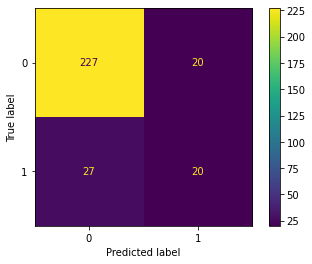

In [43]:
print('ADABoost')
parameters = {
    'n_estimators': [50,100,200,300],
    'learning_rate': [0.1,0.2,1,2],
}
adabc, adabc_results = training_run_classification(AdaBoostClassifier(),parameters,X_train,y_train,X_val,y_val,scoring="balanced_accuracy")

# SVC - Support vector machine Classifier

Fit Linear RBF Kernel SVM Classifier

SVC
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.8775510204081632
Balanced Accuracy: 0.7031613403393918
Precision: 0.6774193548387096
Recall: 0.44680851063829785
f1: 0.5384615384615384
Specificity: 0.9595141700404858


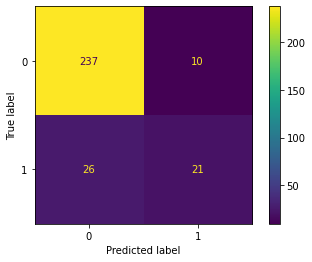

In [44]:
print('SVC')
parameters = {
    'gamma': [0.1,0.01,0.001,0.0001],
    'C': [1,10,100],
    'kernel':['rbf'] # Removing linear kernel as rbf is giving better result
}

svc, svc_results = training_run_classification(SVC(),parameters,X_train,y_train,X_val,y_val,scoring="balanced_accuracy")

#### Under Sampling

SVC-UnderSampling
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.7380952380952381
Balanced Accuracy: 0.7666034972865879
Precision: 0.3584905660377358
Recall: 0.8085106382978723
f1: 0.4967320261437908
Specificity: 0.7246963562753036


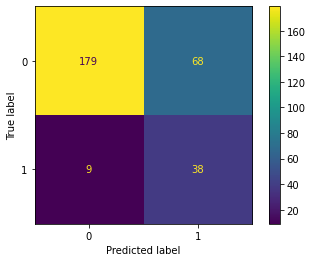

In [45]:
print("SVC-UnderSampling")
parameters = {
    'gamma': [0.1,0.01,0.001,0.0001],
    'C': [1,10,100],
    'kernel':['rbf'] # Removing linear kernel as rbf is giving better result
}

svc_under, svc_under_results = training_run_classification(SVC(),parameters,X_under,y_under,X_val,y_val,scoring="balanced_accuracy")

#### Over Sampling

SVC-OverSampling
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.8605442176870748
Balanced Accuracy: 0.7188819019726074
Precision: 0.5714285714285714
Recall: 0.5106382978723404
f1: 0.5393258426966292
Specificity: 0.9271255060728745


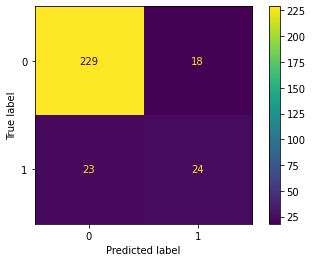

In [46]:
print("SVC-OverSampling")
parameters = {
    'gamma': [0.1,0.01,0.001,0.0001],
    'C': [1,10,100],
    'kernel':['rbf'] # Removing linear kernel as rbf is giving better result
}

svc_over, svc_over_results = training_run_classification(SVC(),parameters,X_over,y_over,X_val,y_val,scoring="recall")

# XGBoost

The XGBoost dataset does not work as well with the scaled transform. Using the original scaling makes a slightly better model.

In [47]:
path = os.path.join("WA_Fn-UseC_-HR-Employee-Attrition.csv")
xg_df = pd.read_csv(path)
xg_df["Attrition"] = xg_df["Attrition"].map({"No": 0, "Yes": 1})
xg_df["BusinessTravel"] = xg_df["BusinessTravel"].map({"Non-Travel": 0, "Travel_Rarely": 1,"Travel_Frequently": 2})
xg_df["OverTime"] = xg_df["OverTime"].map({"No": 0, "Yes": 1})
xg_df = xg_df.drop(["Over18","StandardHours","EmployeeCount","MaritalStatus","EmployeeNumber","Gender"],axis=1)
xg_df = pd.get_dummies(xg_df,columns=["Department","EducationField","JobRole"])
features = xg_df.drop(["Attrition"],axis=1)
label = xg_df["Attrition"]
xg_x_train,xg_x_val,xg_y_train,xg_y_val = train_test_split(features,label,train_size=0.8,random_state=1,shuffle=True,stratify=label)

[08:36:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 50, 'random_state': 1, 'reg_alpha': 10, 'reg_lambda': 1, 'scale_pos_weight': 4, 'tree_method': 'exact'}
Accuracy: 0.8639455782312925
Balanced Accuracy: 0.815660263588595
Precision: 0.5555555555555556
Recall: 0.7446808510638298
f1: 0.6363636363636364
Specificity: 0.8866396761133604


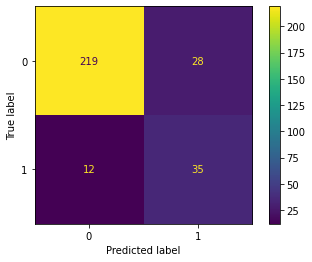

In [48]:
parameters = {
    "n_estimators": [50],
    "max_depth": [None],
    "learning_rate": [0.1],
    "booster": ["gbtree"],
    "tree_method": ["exact"],
    #"n_jobs": [-1],
    "reg_alpha": [10],
    "reg_lambda": [1],
    "scale_pos_weight": [4],
    "random_state": [1]
}

xgb, xgb_results = training_run_classification(XGBClassifier(),parameters,xg_x_train,xg_y_train,xg_x_val,xg_y_val,scoring="precision")

# XGBoost forest

[08:36:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'colsample_bylevel': 0.5, 'colsample_bynode': 0.8, 'colsample_bytree': 1, 'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 1, 'reg_alpha': 10, 'reg_lambda': 10, 'scale_pos_weight': 3, 'subsample': 1, 'tree_method': 'exact', 'use_label_encoder': False}
Accuracy: 0.8571428571428571
Balanced Accuracy: 0.802997674218279
Precision: 0.5396825396825397
Recall: 0.723404255319149
f1: 0.6181818181818182
Specificity: 0.8825910931174089


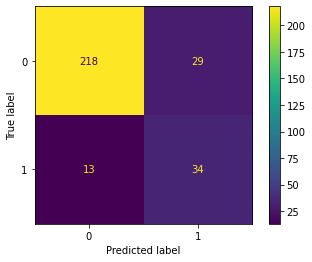

In [49]:
parameters = {
    "n_estimators": [50],
    "use_label_encoder": [False],
    "learning_rate": [0.1],
    "booster": ["gbtree"],
    "tree_method": ["exact"],
    "subsample": [1],
    "colsample_bytree": [1],
    "colsample_bylevel": [0.5],
    "colsample_bynode": [0.8],
    "reg_alpha": [10],
    "reg_lambda": [10],
    "scale_pos_weight": [3],
    "random_state": [1]
}

xgb_rf, xgb_rf_results = training_run_classification(XGBRFClassifier(),parameters,xg_x_train,xg_y_train,xg_x_val,xg_y_val,scoring="precision")

# Random Forest 

{'bootstrap': False, 'class_weight': 'balanced_subsample', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 500}
Accuracy: 0.7687074829931972
Balanced Accuracy: 0.7762081143940047
Precision: 0.3894736842105263
Recall: 0.7872340425531915
f1: 0.5211267605633803
Specificity: 0.7651821862348178


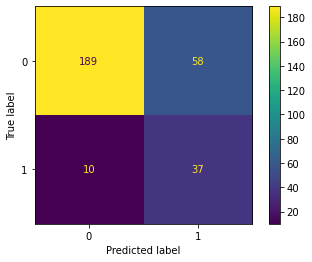

In [50]:
parameters = {
        'n_estimators': [ 500], 
        'max_features': ['sqrt'],
        'max_depth' : [3 ], 
        'min_samples_split' : [ 5],
        'bootstrap' : [True, False],
        'class_weight' : ['balanced_subsample' ]
}

forest, forest_results = training_run_classification(RandomForestClassifier(),parameters,X_train,y_train,X_val,y_val,scoring="balanced_accuracy")


# Gradient Boosting

{'learning_rate': 1, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}
Accuracy: 0.8707482993197279
Balanced Accuracy: 0.7077267637178051
Precision: 0.6285714285714286
Recall: 0.46808510638297873
f1: 0.5365853658536586
Specificity: 0.9473684210526315


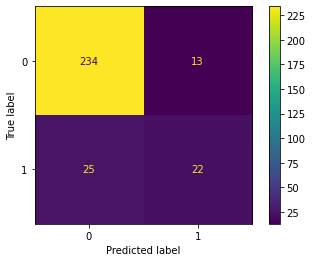

In [51]:
parameters = {
    'learning_rate' : [0.05, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [20], 
    'max_features' : [2],
    'max_depth' : [2],
    
}

gb, gb_results = training_run_classification(GradientBoostingClassifier(),parameters,X_train,y_train,X_val,y_val,scoring="balanced_accuracy")


In [52]:
results = pd.DataFrame([adabc_results,svc_results,svc_under_results,svc_over_results,xgb_results,xgb_rf_results,forest_results,gb_results])
results["Model"] = ["ADABoost","SVC","SVC_Under","SVC_Over","XGBoost","XG forest","Random forest","Gradient boost"]

In [53]:
results

,Accuracy,Balanced Accuracy,Precision,Recall,f1,Specificity,Model
0,0.840136,0.672280,0.500000,0.425532,0.459770,0.919028,ADABoost
1,0.877551,0.703161,0.677419,0.446809,0.538462,0.959514,SVC
2,0.738095,0.766603,0.358491,0.808511,0.496732,0.724696,SVC_Under
3,0.860544,0.718882,0.571429,0.510638,0.539326,0.927126,SVC_Over
4,0.863946,0.815660,0.555556,0.744681,0.636364,0.886640,XGBoost
5,0.857143,0.802998,0.539683,0.723404,0.618182,0.882591,XG forest
6,0.768707,0.776208,0.389474,0.787234,0.521127,0.765182,Random forest
7,0.870748,0.707727,0.628571,0.468085,0.536585,0.947368,Gradient boost


In [54]:
results.sort_values(["Balanced Accuracy","Accuracy"])

,Accuracy,Balanced Accuracy,Precision,Recall,f1,Specificity,Model
0,0.840136,0.672280,0.500000,0.425532,0.459770,0.919028,ADABoost
1,0.877551,0.703161,0.677419,0.446809,0.538462,0.959514,SVC
7,0.870748,0.707727,0.628571,0.468085,0.536585,0.947368,Gradient boost
3,0.860544,0.718882,0.571429,0.510638,0.539326,0.927126,SVC_Over
2,0.738095,0.766603,0.358491,0.808511,0.496732,0.724696,SVC_Under
6,0.768707,0.776208,0.389474,0.787234,0.521127,0.765182,Random forest
5,0.857143,0.802998,0.539683,0.723404,0.618182,0.882591,XG forest
4,0.863946,0.815660,0.555556,0.744681,0.636364,0.886640,XGBoost


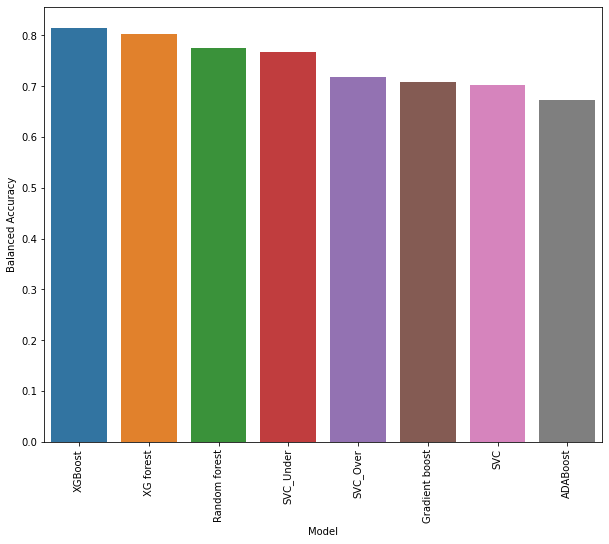

In [55]:
plt.figure(figsize=[10,8])
sns.barplot(x = 'Model', y = 'Balanced Accuracy', data=results, order = results.sort_values('Balanced Accuracy',ascending = False).Model)
plt.xticks(rotation = 90)
plt.show()

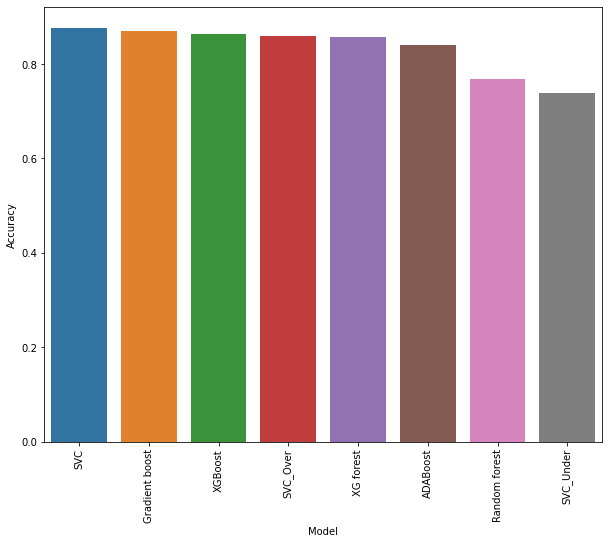

In [56]:
plt.figure(figsize=[10,8])
sns.barplot(x = 'Model', y = 'Accuracy', data=results, order = results.sort_values('Accuracy',ascending = False).Model)
plt.xticks(rotation = 90)
plt.show()

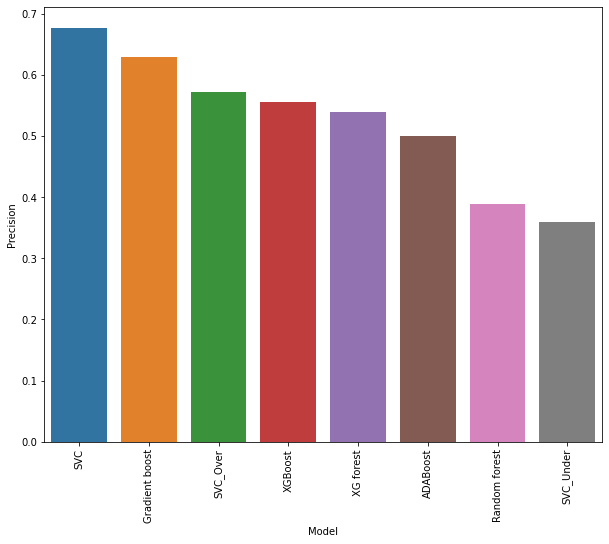

In [57]:
plt.figure(figsize=[10,8])
sns.barplot(x = 'Model', y = 'Precision', data=results, order = results.sort_values('Precision',ascending = False).Model)
plt.xticks(rotation = 90)
plt.show()

# Clustering- Mariia Models 

In [58]:
kmeans = KMeans(n_clusters=4, random_state=1).fit(X_train)

In [59]:
y_kmeans = kmeans.fit_predict(X_train)

In [60]:
pca = PCA(n_components=2,random_state=1).fit(X_train)
pca_3 = pca.transform(X_train)

## PCA of true training labels

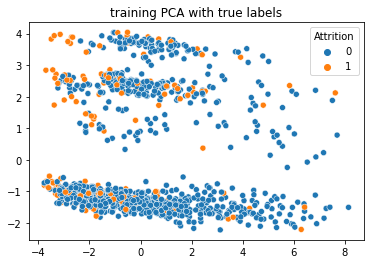

In [61]:
fig = sns.scatterplot(x=pca_3[:,0],y=pca_3[:,1],hue=y_train)
fig.set_title("training PCA with true labels")
plt.show()

## PCA of clusters

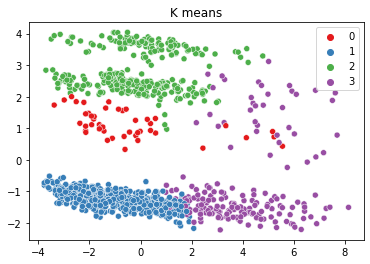

In [62]:
fig = sns.scatterplot(x=pca_3[:,0],y=pca_3[:,1],hue=y_kmeans,palette="Set1")
fig.set_title("K means")
plt.show()

Let's get the label composition per cluster

In [63]:
df_X_train, df_X_val, df_y_train, df_y_val = train_test_split(X, y,stratify=y, test_size=0.20, random_state=1)
df_X_train["kmeans"] = y_kmeans
df_X_train["label"] = df_y_train

In [64]:
df_X_train[["label","kmeans"]].groupby(["kmeans","label"]).size()

kmeans  label
0       0         34
        1         12
1       0        522
        1        100
2       0        248
        1         69
3       0        182
        1          9
dtype: int64

In [65]:
df_X_train[["label","kmeans"]].groupby(["kmeans","label"]).size().groupby(level=[0]).apply(lambda x: x/x.sum())

kmeans  label
0       0        0.739130
        1        0.260870
1       0        0.839228
        1        0.160772
2       0        0.782334
        1        0.217666
3       0        0.952880
        1        0.047120
dtype: float64

## Validation PCA

In [66]:
val_kmeans = kmeans.predict(X_val)
val_pca = pca.transform(X_val)

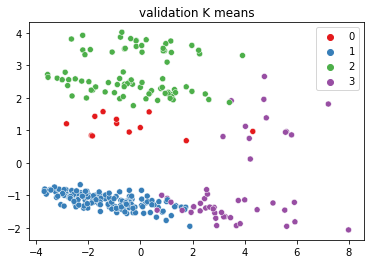

In [67]:
fig = sns.scatterplot(x=val_pca[:,0],y=val_pca[:,1],hue=val_kmeans,palette="Set1")
fig.set_title("validation K means")
plt.show()

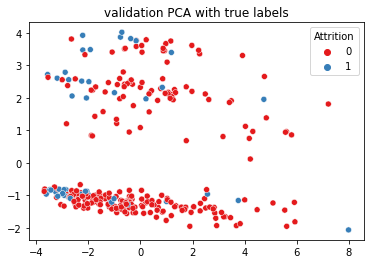

,label
cluster,
0,0
1,24
2,19
3,4


In [68]:
fig = sns.scatterplot(x=val_pca[:,0],y=val_pca[:,1],hue=y_val,palette="Set1")
fig.set_title("validation PCA with true labels")
plt.show()

dftemp = df_X_val.copy()
dftemp["cluster"] = val_kmeans
dftemp["label"] = y_val
dftemp[["cluster","label"]].groupby(["cluster"]).sum()

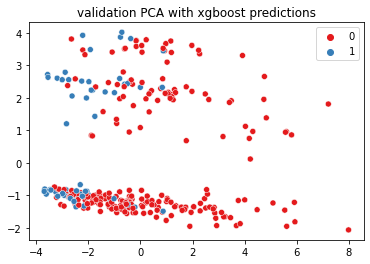

         predict
cluster         
0              2
1             36
2             25
3              0
         correct
cluster         
0              0
1             20
2             15
3              0


In [69]:
fig = sns.scatterplot(x=val_pca[:,0],y=val_pca[:,1],hue=xgb.predict(xg_x_val),palette="Set1")
fig.set_title("validation PCA with xgboost predictions")
plt.show()

dftemp = df_X_val.copy()
dftemp["cluster"] = val_kmeans
dftemp["correct"] = xg_y_val & xgb.predict(xg_x_val)
dftemp["predict"] = xgb.predict(xg_x_val)
print(dftemp[["cluster","predict"]].groupby(["cluster"]).sum())
print(dftemp[["cluster","correct"]].groupby(["cluster"]).sum())

XGboost was unable pick up a single positive sample in cluster 3. It did not even predict any positives in that cluster.

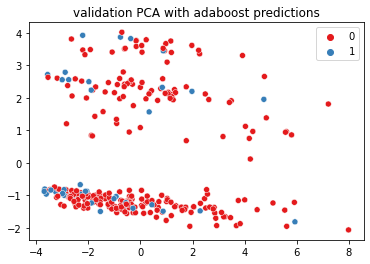

         predict
cluster         
0              1
1             24
2             12
3              3
         correct
cluster         
0              0
1             11
2              8
3              1


In [70]:
fig = sns.scatterplot(x=val_pca[:,0],y=val_pca[:,1],hue=adabc.predict(X_val),palette="Set1")
fig.set_title("validation PCA with adaboost predictions")
plt.show()

dftemp = df_X_val.copy()
dftemp["cluster"] = val_kmeans
dftemp["correct"] = y_val & adabc.predict(X_val)
dftemp["predict"] = adabc.predict(X_val)
print(dftemp[["cluster","predict"]].groupby(["cluster"]).sum())
print(dftemp[["cluster","correct"]].groupby(["cluster"]).sum())

Ada boost was able to predict into all 4 clusters. However it is weak overall. It can only predict half or less for each cluster.

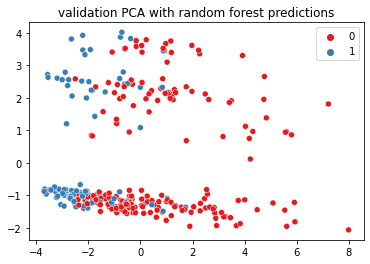

         predict
cluster         
0              3
1             62
2             29
3              1
         correct
cluster         
0              0
1             22
2             15
3              0


In [71]:
fig = sns.scatterplot(x=val_pca[:,0],y=val_pca[:,1],hue=forest.predict(X_val),palette="Set1")
fig.set_title("validation PCA with random forest predictions")
plt.show()

dftemp = df_X_val.copy()
dftemp["cluster"] = val_kmeans
dftemp["correct"] = y_val & forest.predict(X_val)
dftemp["predict"] = forest.predict(X_val)
print(dftemp[["cluster","predict"]].groupby(["cluster"]).sum())
print(dftemp[["cluster","correct"]].groupby(["cluster"]).sum())

Random forest is able to pick up more due a higher bias to predicting positive attrition. However, like the other models, it struggles with cluster 3.

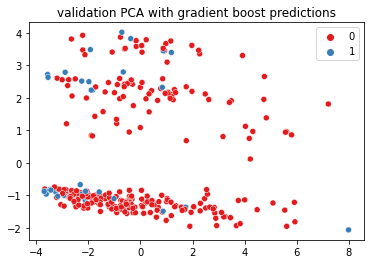

         predict
cluster         
0              0
1             20
2             14
3              1
         correct
cluster         
0              0
1             12
2              9
3              1


In [72]:
fig = sns.scatterplot(x=val_pca[:,0],y=val_pca[:,1],hue=gb.predict(X_val),palette="Set1")
fig.set_title("validation PCA with gradient boost predictions")
plt.show()

dftemp = df_X_val.copy()
dftemp["cluster"] = val_kmeans
dftemp["correct"] = y_val & gb.predict(X_val)
dftemp["predict"] = gb.predict(X_val)
print(dftemp[["cluster","predict"]].groupby(["cluster"]).sum())
print(dftemp[["cluster","correct"]].groupby(["cluster"]).sum())

Gradient boost performs similar to adaboost. It is weak overall.

All the models had a weakness to predicting cluster 3. It seems to be due to the high spread in that cluster. All the points have a large distance between them, meaning that not many points are similar to each other. This would cause poor generalization ability for any model working on points in that cluster.

In [73]:
dftemp[dftemp["cluster"]==3].describe()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,cluster,correct,predict
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.000000,47.000000,47.000000,47.0,47.000000,47.0,47.000000,47.000000,47.000000,47.0,47.000000,47.000000
mean,45.170213,1.191489,799.978723,7.787234,3.212766,2.723404,0.446809,70.297872,2.744681,3.978723,2.489362,15260.617021,16191.127660,3.702128,0.319149,15.617021,3.191489,2.851064,0.702128,23.170213,2.744681,2.872340,13.021277,5.893617,5.106383,6.106383,0.021277,0.744681,0.234043,0.0,0.319149,0.042553,0.510638,0.042553,0.085106,0.085106,0.0,0.021277,0.361702,0.063830,0.382979,0.0,0.085106,0.0,0.276596,0.404255,0.319149,3.0,0.021277,0.021277
std,7.007199,0.495120,386.570230,7.339400,1.178359,1.097470,0.502538,19.046756,0.641604,0.846716,1.177181,3919.419431,6993.220104,2.669594,0.471186,4.351677,0.397727,0.999537,0.906855,6.329088,1.092824,0.536374,9.223056,4.621472,4.850971,4.087276,0.145865,0.440755,0.427976,0.0,0.471186,0.204030,0.505291,0.204030,0.282057,0.282057,0.0,0.145865,0.485688,0.247092,0.491369,0.0,0.282057,0.0,0.452151,0.496053,0.471186,0.0,0.145865,0.145865
min,29.000000,0.000000,117.000000,1.000000,1.000000,1.000000,0.000000,31.000000,1.000000,2.000000,1.000000,4553.000000,2137.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.0,0.000000,0.000000
25%,40.000000,1.000000,479.500000,2.000000,2.500000,2.000000,0.000000,55.500000,2.000000,3.000000,1.000000,13354.500000,11332.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,20.500000,2.000000,3.000000,4.500000,2.000000,1.000000,2.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.0,0.000000,0.000000
50%,45.000000,1.000000,797.000000,5.000000,3.000000,3.000000,0.000000,69.000000,3.000000,4.000000,3.000000,16015.000000,17381.000000,3.000000,0.000000,14.000000,3.000000,3.000000,0.000000,23.000000,2.000000,3.000000,14.000000,6.000000,4.000000,7.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,3.0,0.000000,0.000000
75%,50.000000,1.000000,1158.500000,10.000000,4.000000,4.000000,1.000000,88.000000,3.000000,5.000000,3.000000,18874.500000,21925.000000,6.000000,1.000000,18.500000,3.000000,4.000000,1.000000,27.500000,3.000000,3.000000,21.000000,9.000000,10.000000,8.500000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0

In [74]:
from sklearn.metrics.cluster import contingency_matrix
x = kmeans.labels_
y = y_train
contingency_matrix(x,y)

array([[ 34,  12],
       [522, 100],
       [248,  69],
       [182,   9]], dtype=int64)

In [75]:
df_cl0 = X_train[kmeans.labels_ == 0]
df_cl1 = X_train[kmeans.labels_ == 1]
df_cl2 = X_train[kmeans.labels_ == 2]

# Vizualize models

## XGBoost

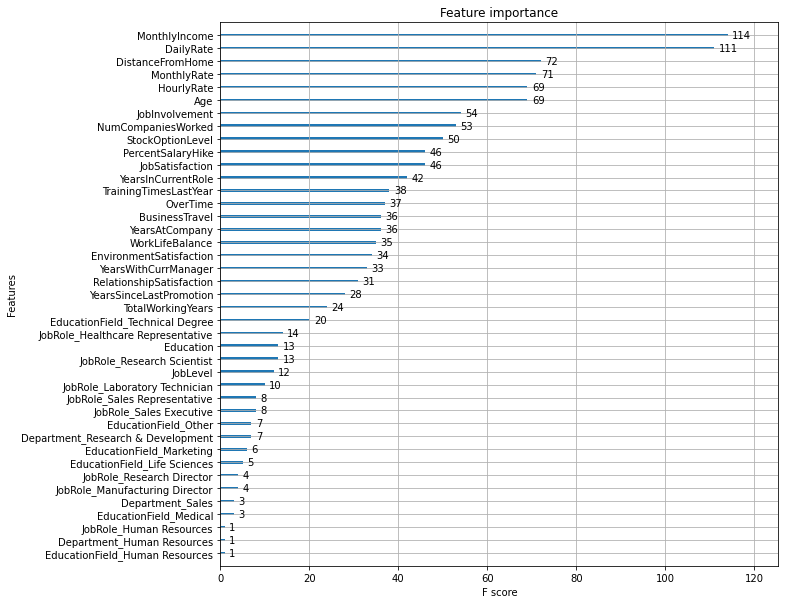

In [76]:
rcParams['figure.figsize'] = 10,10
plot_importance(xgb)
plt.show()

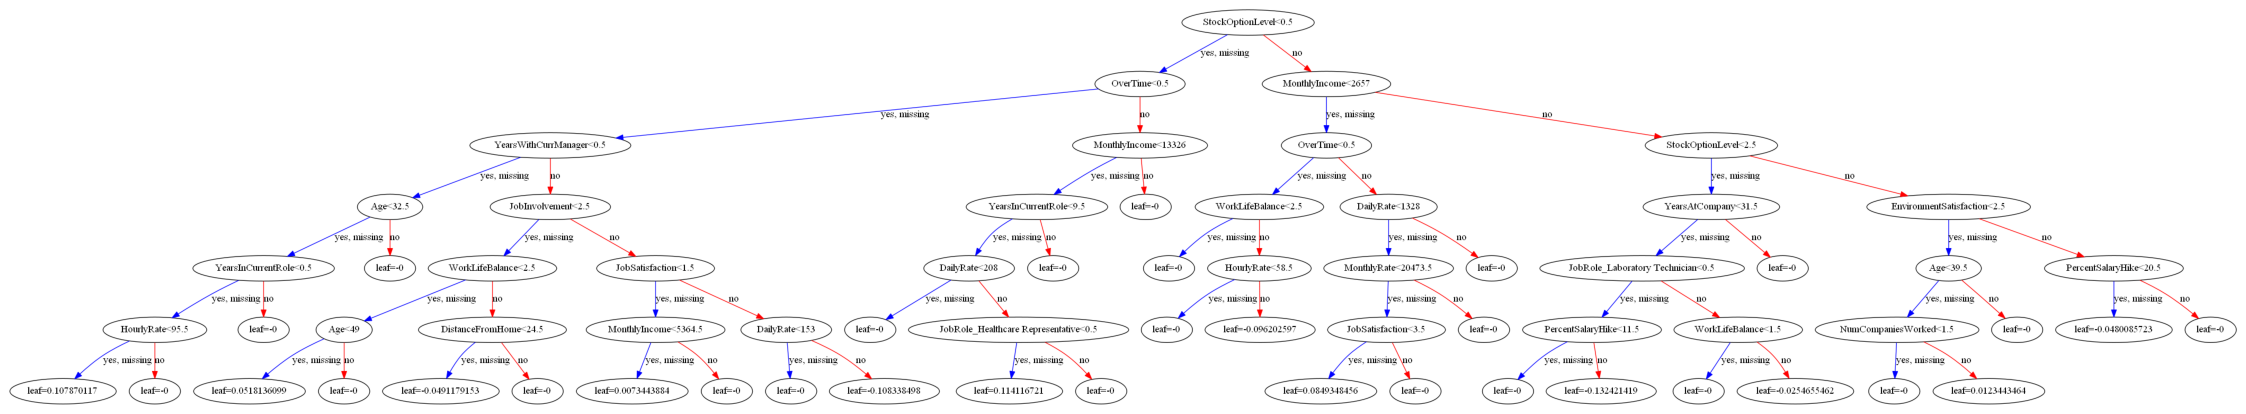

In [77]:
rcParams['figure.figsize'] = 40,60
plot_tree(xgb,num_trees=1)
plt.show()

## Random Forest

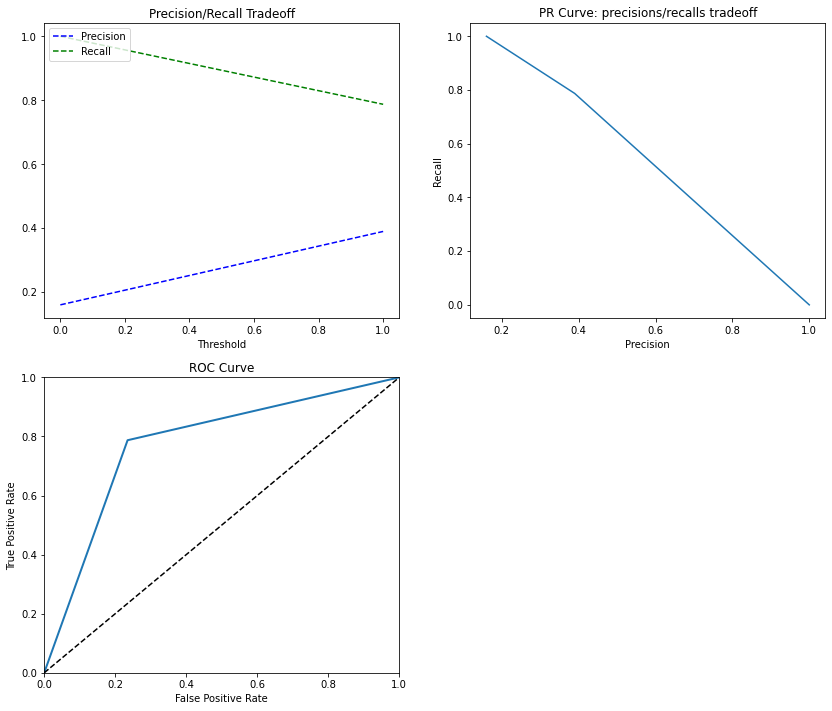

In [78]:
plot(forest,y_val)

## Gradient Boosting

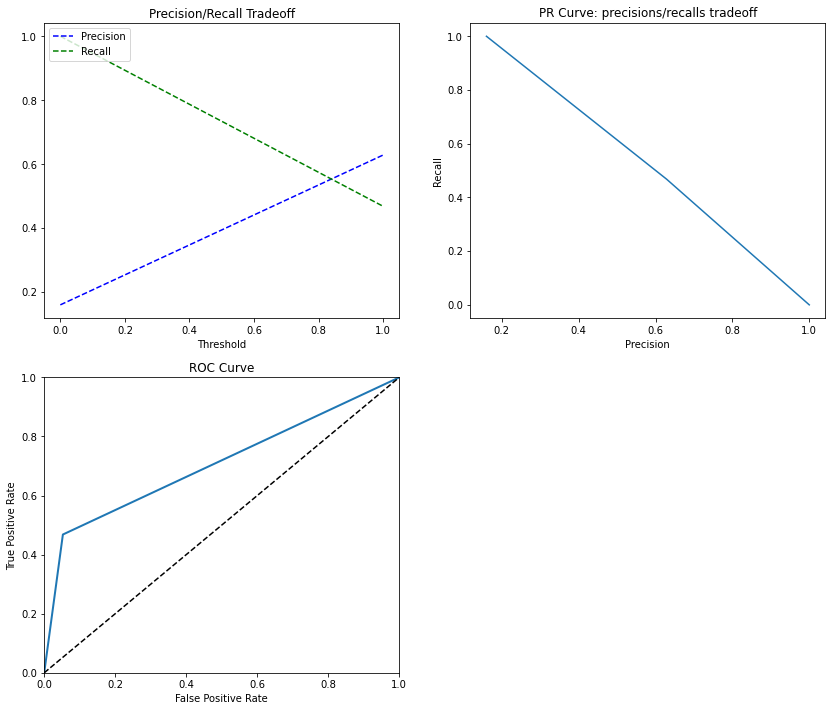

In [79]:
plot(gb,y_val)

## Feature Importance

### Gradient Boosting 

In [80]:
[print(i) for i in zip(X.columns, gb.feature_importances_)];

('Age', 0.0)
('BusinessTravel', 0.0017022794338416927)
('DailyRate', 0.04756050646326964)
('DistanceFromHome', 0.03210441984282759)
('Education', 0.0009572342323927735)
('EnvironmentSatisfaction', 0.05642155005024387)
('Gender', 0.011567070343934381)
('HourlyRate', 0.005888603740676285)
('JobInvolvement', 0.07322412589321746)
('JobLevel', 0.11392423067551052)
('JobSatisfaction', 0.03370206159870633)
('MonthlyIncome', 0.05884173282879268)
('MonthlyRate', 0.01841832312096736)
('NumCompaniesWorked', 0.024874599868939837)
('OverTime', 0.14831203696127102)
('PercentSalaryHike', 0.008240153433447944)
('PerformanceRating', 0.0)
('RelationshipSatisfaction', 0.012842539905009031)
('StockOptionLevel', 0.035761672210077394)
('TotalWorkingYears', 0.015015598494657433)
('TrainingTimesLastYear', 0.006332445406112812)
('WorkLifeBalance', 0.043953568661267435)
('YearsAtCompany', 0.020114141738647718)
('YearsInCurrentRole', 0.008376583721987019)
('YearsSinceLastPromotion', 0.0)
('YearsWithCurrManager',

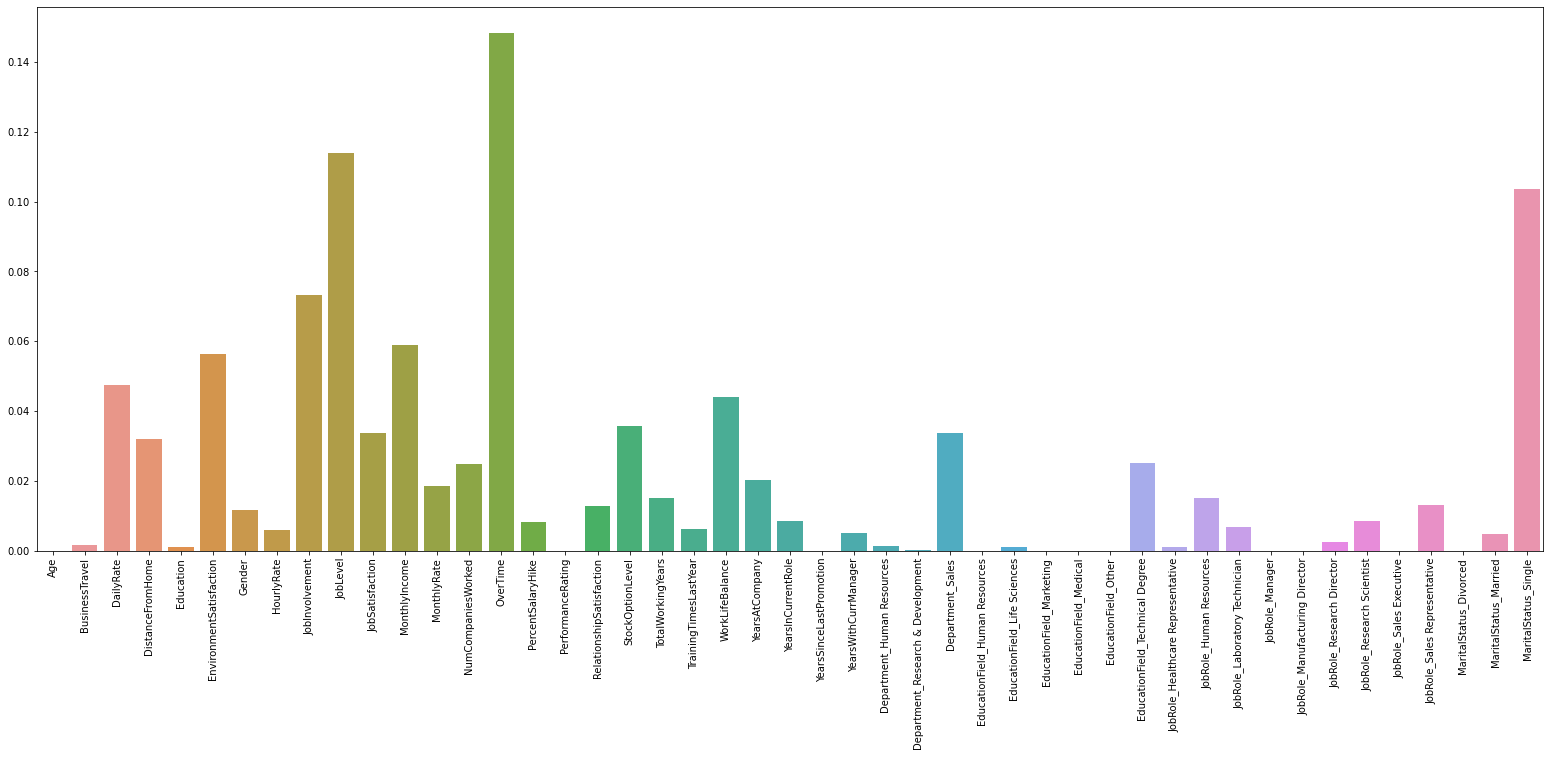

In [81]:
plt.figure(figsize=[27,10])
importance = gb.feature_importances_
feature_name = X.columns
sns.barplot(x = feature_name, y = importance)
plt.xticks(rotation = 90)

plt.show()

# ADABoost

In [82]:
[print(i) for i in zip(X.columns, adabc.feature_importances_)];

('Age', 0.03666666666666667)
('BusinessTravel', 0.016666666666666666)
('DailyRate', 0.13666666666666666)
('DistanceFromHome', 0.023333333333333334)
('Education', 0.0)
('EnvironmentSatisfaction', 0.016666666666666666)
('Gender', 0.006666666666666667)
('HourlyRate', 0.06666666666666667)
('JobInvolvement', 0.016666666666666666)
('JobLevel', 0.016666666666666666)
('JobSatisfaction', 0.016666666666666666)
('MonthlyIncome', 0.17333333333333334)
('MonthlyRate', 0.13)
('NumCompaniesWorked', 0.016666666666666666)
('OverTime', 0.02)
('PercentSalaryHike', 0.03333333333333333)
('PerformanceRating', 0.0)
('RelationshipSatisfaction', 0.013333333333333334)
('StockOptionLevel', 0.013333333333333334)
('TotalWorkingYears', 0.03333333333333333)
('TrainingTimesLastYear', 0.01)
('WorkLifeBalance', 0.013333333333333334)
('YearsAtCompany', 0.05333333333333334)
('YearsInCurrentRole', 0.016666666666666666)
('YearsSinceLastPromotion', 0.03)
('YearsWithCurrManager', 0.03333333333333333)
('Department_Human Resour

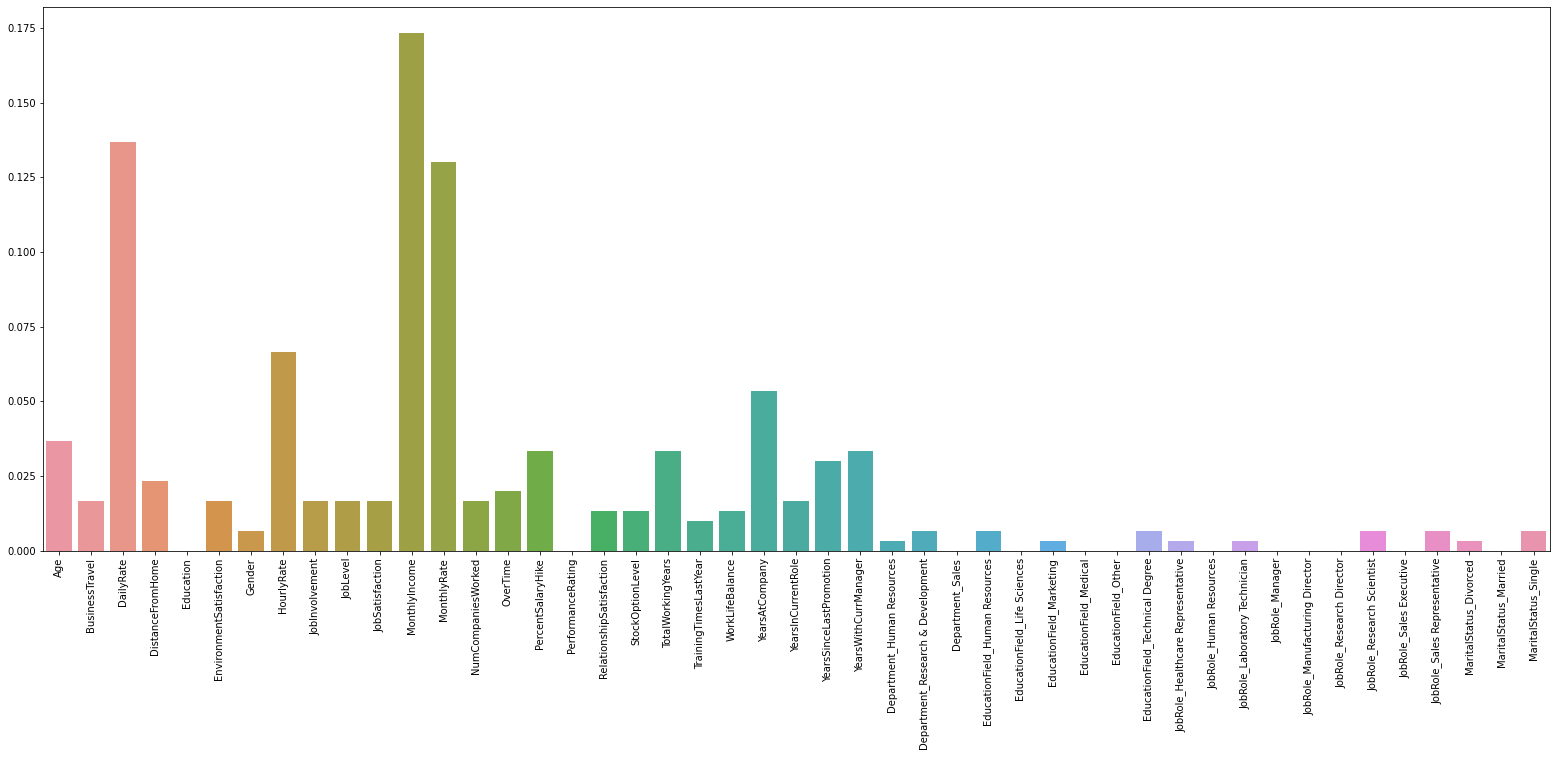

In [83]:
plt.figure(figsize=[27,10])
importance = adabc.feature_importances_
feature_name = X.columns
sns.barplot(x = feature_name, y = importance)
plt.xticks(rotation = 90)
plt.show()

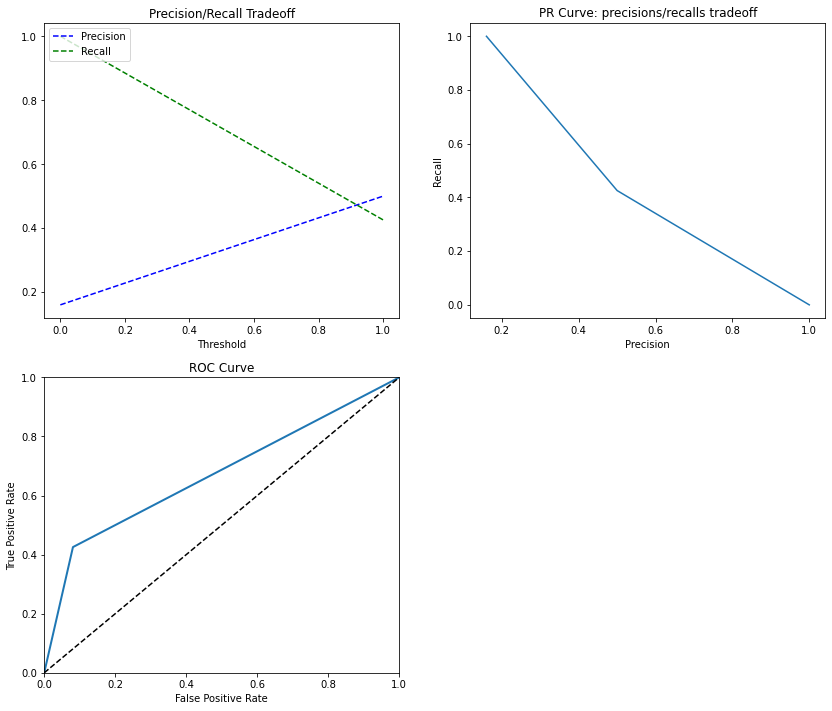

In [84]:
plot(adabc,y_val)

# SVC

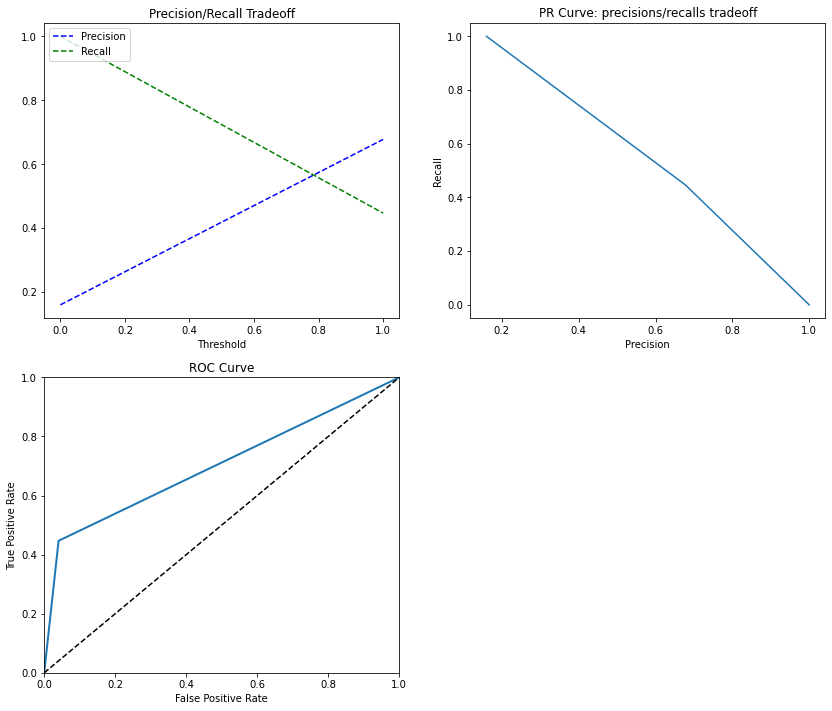

In [85]:
plot(svc,y_val)